<a href="https://colab.research.google.com/github/TienLungSun/PyTorch-deep-learning/blob/main/2.1.%20MLP%20regression(new).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime

In [2]:
import torch
import torch.utils.data as Data
import torch.nn as nn

In [3]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla T4


# Upload excel data file to Colab
# Read data file to dataframe --> convert to numpy array

In [4]:
fname = "diabetes_dataset_regression_practice.xlsx"
df=pd.read_excel(fname)

In [5]:
df.head(3)

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141


In [6]:
df.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       'Target'],
      dtype='object')

In [7]:
dfX = df[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10']]
dfY = df[['Target']]

In [8]:
#convert data to numpy array
numpyX = np.array(dfX.values)
numpyY = np.array(dfY.values)
print(numpyX.shape, numpyY.shape)

(442, 10) (442, 1)


#Split input data to train and test data

In [9]:
trainX, testX, trainY, testY = train_test_split(numpyX, numpyY, test_size=0.20, random_state=0)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(353, 10) (89, 10) (353, 1) (89, 1)


# Build NN

In [10]:
MyNet = nn.Sequential(
    nn.Linear(10, 128),
    nn.Tanh(),
    nn.Dropout(p=0.5),
    nn.Linear(128, 256),
    nn.Tanh(),
    nn.Dropout(p=0.5),
    nn.Linear(256, 128),
    nn.Tanh(),
    nn.Dropout(p=0.5),
    nn.Linear(128, 64),
    nn.Tanh(),
    nn.Dropout(p=0.5),
    nn.Linear(64, 1),
)
MyNet.to(device)
print(MyNet)

Sequential(
  (0): Linear(in_features=10, out_features=128, bias=True)
  (1): Tanh()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=128, out_features=256, bias=True)
  (4): Tanh()
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=256, out_features=128, bias=True)
  (7): Tanh()
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=128, out_features=64, bias=True)
  (10): Tanh()
  (11): Dropout(p=0.5, inplace=False)
  (12): Linear(in_features=64, out_features=1, bias=True)
)


# Train NN

In [11]:
train_lossLst = []
validation_lossLst = []

In [12]:
# split training data to train and validation
trainX, validationX, trainY, validationY = train_test_split(trainX, trainY, test_size=0.20, random_state=0)
tensor_trainX = torch.FloatTensor(trainX).to(device)
tensor_trainY = torch.FloatTensor(trainY).to(device)

tensor_validationX = torch.FloatTensor(validationX).to(device)
tensor_validationY = torch.FloatTensor(validationY).to(device)

In [13]:
print(tensor_trainX.shape, tensor_trainY.shape, tensor_validationX.shape, tensor_validationY.shape)

torch.Size([282, 10]) torch.Size([282, 1]) torch.Size([71, 10]) torch.Size([71, 1])


In [14]:
# Generate mini-batches of training data
BATCH_SIZE = 32   #try 1/5, 1/10, 1/15 of the training data
torch_dataset = Data.TensorDataset(tensor_trainX, tensor_trainY)
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0,
)

In [15]:
# initialize NN weights
for name, param in MyNet.named_parameters():
  if(param.requires_grad):
    torch.nn.init.normal_(param, mean=0.0, std=0.02)
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.00003)

In [18]:
# training loop
epoch_lossLst=[]
for epoch in range(1, 2000):
  if(epoch%200 == 0):
    print(epoch, end=",")
  for (batchX, batchY) in loader:
    batchY_hat = MyNet(batchX)
    loss = loss_func(batchY_hat, batchY)
    epoch_lossLst.append(float(loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  avg = sum(epoch_lossLst)/len(epoch_lossLst)
  train_lossLst.append(avg)
  with torch.no_grad():
      tensor_validationY_hat = MyNet(tensor_validationX)
      validatiion_loss = loss_func(tensor_validationY_hat, tensor_validationY)
      validation_lossLst.append(float(validatiion_loss))

200,400,600,800,1000,1200,1400,1600,1800,

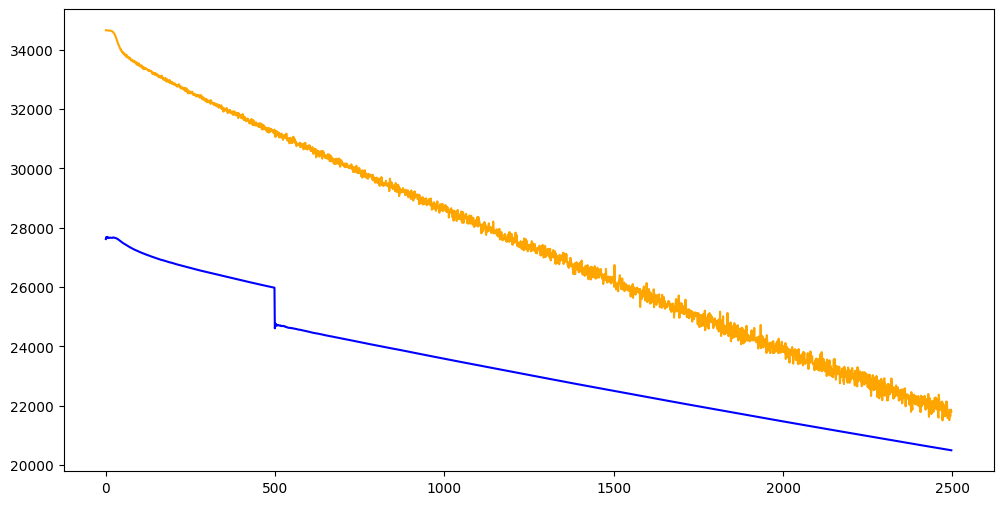

In [19]:
fig=plt.figure(figsize=(12, 6))
plt.plot(train_lossLst, color='blue')
plt.plot(validation_lossLst, color='orange')
plt.show()

In [20]:
# save model of this training
current_time = datetime.datetime.now()
formatted_time = current_time.strftime("%m-%d-%H-%M-%S")
print(formatted_time)
fname = formatted_time + ".pth"
torch.save(MyNet.state_dict(), fname)

11-25-03-29-57


# Go back to Train NN and repeat N times.

# Load the model with best performance and test.

In [21]:
MyNet.load_state_dict(torch.load('11-25-03-29-57.pth'))

<All keys matched successfully>

In [22]:
MyNet.eval()
MyNet.to(device)

Sequential(
  (0): Linear(in_features=10, out_features=128, bias=True)
  (1): Tanh()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=128, out_features=256, bias=True)
  (4): Tanh()
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=256, out_features=128, bias=True)
  (7): Tanh()
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=128, out_features=64, bias=True)
  (10): Tanh()
  (11): Dropout(p=0.5, inplace=False)
  (12): Linear(in_features=64, out_features=1, bias=True)
)

In [23]:
# Test to check generalized prediction performance
tensorX = torch.FloatTensor(testX).to(device)
tensorY = torch.FloatTensor(testY).to(device)
tensorY_hat = MyNet(tensorX)
loss = loss_func(tensorY, tensorY_hat)
print("%.2f" % (float(loss)), end = ", ")

17240.06, 